In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("modelo.h5")

Epoch 1/25
981/981 [==============================] - 34s 33ms/step - loss: 1.7877 - accuracy: 0.5724 - val_loss: 0.3465 - val_accuracy: 0.9051
Epoch 2/25
981/981 [==============================] - 35s 36ms/step - loss: 0.5020 - accuracy: 0.8594 - val_loss: 0.1819 - val_accuracy: 0.9630
Epoch 3/25
981/981 [==============================] - 33s 33ms/step - loss: 0.3399 - accuracy: 0.9060 - val_loss: 0.0971 - val_accuracy: 0.9745
Epoch 4/25
981/981 [==============================] - 32s 32ms/step - loss: 0.2836 - accuracy: 0.9211 - val_loss: 0.0968 - val_accuracy: 0.9717
Epoch 5/25
981/981 [==============================] - 32s 32ms/step - loss: 0.2600 - accuracy: 0.9277 - val_loss: 0.0831 - val_accuracy: 0.9777
Epoch 6/25
981/981 [==============================] - 31s 32ms/step - loss: 0.2328 - accuracy: 0.9376 - val_loss: 0.0602 - val_accuracy: 0.9841
Epoch 7/25
981/981 [==============================] - 31s 32ms/step - loss: 0.2277 - accuracy: 0.9396 - val_loss: 0.0605 - val_accuracy:

In [47]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [7]:
model = load_model("modelo.h5")
model

In [55]:
y_test = pd.read_csv('Train.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test) 

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test)
model.save('classificacao.h5')

395/395 [==============================] - 2s 5ms/step


In [66]:
model.predict(np.array(X_test))[0]

395/395 [==============================] - 2s 5ms/step


array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9144e-32,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00], dtype=float32)

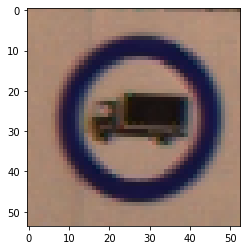

In [28]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook


#Import image
img_test = cv2.imread(imgs[0])

#Show the image with matplotlib
plt.imshow(img_test)
plt.show()